<a href="https://colab.research.google.com/github/debgit/Deep-Learning/blob/master/S8/EVA4S11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
sys.path.append('/content/gdrive/My Drive/EVA4/model/')  #Path for model
sys.path.append('/content/gdrive/My Drive/EVA4/modelutil/') #Path for Graph Plottinng, Training & Test/Evaluation Logic
sys.path.append('/content/gdrive/My Drive/EVA4/data/') #Path for DataLoad
sys.path.append('/content/gdrive/My Drive/EVA4/datautil/') #Path for DataTransformation 

In [3]:
from dataset import dataset
data = dataset(batch_size_cuda= 512,batch_size_cpu=64,num_workers=4, epochs= 24)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
from torchsummary import summary
import resnet
from resnet import ResNetA11
from resnet_Asg11 import Net
#model_old = resnet.ResNet18()
model= ResNetA11()
#model= Net()
model.device = data.device
model.to(model.device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
 ModifiedResBlock-14          [-1, 128,

In [5]:
from runlr import runlr
import torch.nn as nn
import torch.optim as optim

  pip install torch-lr-finder -v --global-option="amp"



Learning rate search finished. See the graph with {finder_name}.plot()
Min loss:0.37708433734547936 Min LR:0.3367428920784385 Max LR:1.0007015575559284


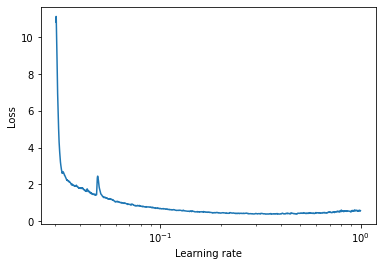

In [6]:
from oclr import oclr
oclrdata = oclr(L1lambda= 0 , L2lambda =1e-4 , lr=1e-7, momentum=0.9, nesterov=True,model= model, data = data) 

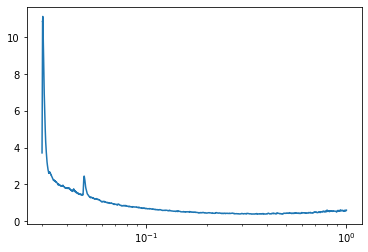

In [7]:
import matplotlib.pyplot as plt
lrs = oclrdata.lr_finder.history['lr']
acc = oclrdata.lr_finder.history['loss']
plt.plot(lrs,acc)#,lrs)
plt.xscale("log")

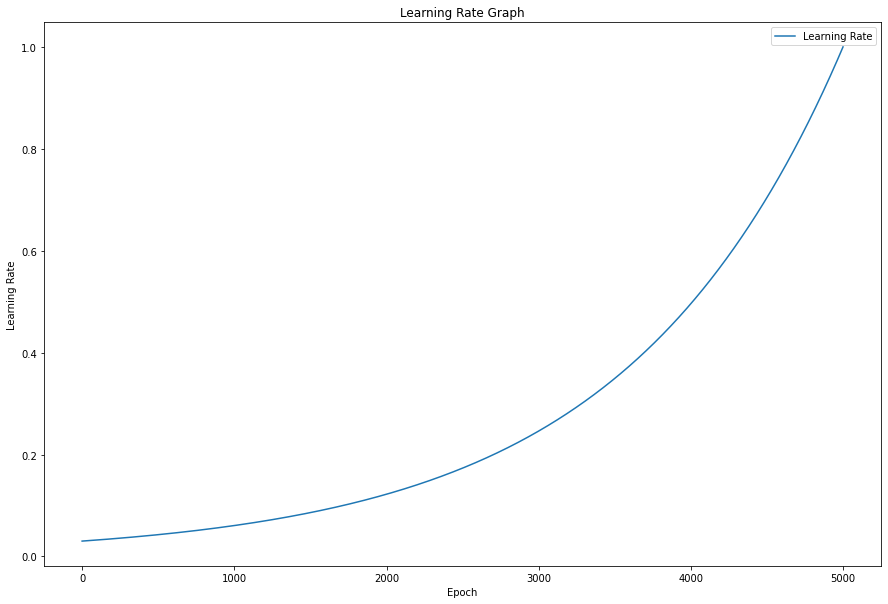

In [8]:
  plt.figure(figsize=(15, 10))
  ax = plt.subplot(111)
  ax.plot(lrs)
  ax.set(title="Learning Rate Graph",  xlabel="Epoch", ylabel="Learning Rate")
  ax.legend(['Learning Rate', 'Epoch'], loc='best')
  plt.savefig("LearningRate.png")
  plt.show()

In [9]:
import pandas as pd
import numpy as np
df_lrf = pd.DataFrame(oclrdata.lr_finder.history)
df_lrf.describe()

,lr,loss
count,5000.000000,5000.000000
mean,0.276916,0.855776
std,0.257085,0.955577
min,0.030042,0.377084
25%,0.072173,0.427862
50%,0.173387,0.531702
75%,0.416544,0.897871
max,1.000702,11.138224


In [10]:
from runmodel import runmodel
modeldata = runmodel(optimizer=oclrdata.optimizer,scheduler=oclrdata.scheduler,L2lambda = 0.0000, lr=0.015084,momentum=0.85,nesterov=True,epoch=data.epochs, model= model, data = data) 

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0  -- - Learning Rate:  0.0017890624999999938


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 2847/10000 (28.47%)

EPOCH: 1  -- - Learning Rate:  0.023639332069149005


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 3363/10000 (33.63%)

EPOCH: 2  -- - Learning Rate:  0.08078501229998869


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0026, Accuracy: 5380/10000 (53.80%)

EPOCH: 3  -- - Learning Rate:  0.15124391287201586


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0021, Accuracy: 6342/10000 (63.42%)

EPOCH: 4  -- - Learning Rate:  0.20791265596399924


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0017, Accuracy: 7110/10000 (71.10%)

EPOCH: 5  -- - Learning Rate:  0.2289994818129049


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0015, Accuracy: 7480/10000 (74.80%)

EPOCH: 6  -- - Learning Rate:  0.22738268782989016


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0014, Accuracy: 7729/10000 (77.29%)

EPOCH: 7  -- - Learning Rate:  0.22268971474976798


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8017/10000 (80.17%)

EPOCH: 8  -- - Learning Rate:  0.2150484671582532


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 3177/10000 (31.77%)

EPOCH: 9  -- - Learning Rate:  0.20466720335788668


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0010, Accuracy: 8172/10000 (81.72%)

EPOCH: 10  -- - Learning Rate:  0.1918288593943077


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8480/10000 (84.80%)

EPOCH: 11  -- - Learning Rate:  0.1768833377787581


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0009, Accuracy: 8476/10000 (84.76%)

EPOCH: 12  -- - Learning Rate:  0.1602379710737502


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0008, Accuracy: 8607/10000 (86.07%)

EPOCH: 13  -- - Learning Rate:  0.14234642025200342


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0008, Accuracy: 8667/10000 (86.67%)

EPOCH: 14  -- - Learning Rate:  0.12369631039820933


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0008, Accuracy: 8644/10000 (86.44%)

EPOCH: 15  -- - Learning Rate:  0.10479594073626249


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0007, Accuracy: 8782/10000 (87.82%)

EPOCH: 16  -- - Learning Rate:  0.0861604311933805


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0007, Accuracy: 8878/10000 (88.78%)

EPOCH: 17  -- - Learning Rate:  0.0682976830694369


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 8949/10000 (89.49%)

EPOCH: 18  -- - Learning Rate:  0.0516945364462974


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 8947/10000 (89.47%)

EPOCH: 19  -- - Learning Rate:  0.03680350160990167


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9033/10000 (90.33%)

EPOCH: 20  -- - Learning Rate:  0.02403042611340975


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9044/10000 (90.44%)

EPOCH: 21  -- - Learning Rate:  0.013723433609310038


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0006, Accuracy: 9079/10000 (90.79%)

EPOCH: 22  -- - Learning Rate:  0.006163435916974737


  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0005, Accuracy: 9103/10000 (91.03%)

EPOCH: 23  -- - Learning Rate:  0.001556476914417622


Loss=0.201 Accuracy=91.06: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]


Test set: Average loss: 0.0005, Accuracy: 9100/10000 (91.00%)



In [11]:
print('Best Training Accuracy : ', max(modeldata.train_acc))
print('Best Test Accuracy : ', max(modeldata.test_accs))

Best Training Accuracy :  91.062
Best Test Accuracy :  91.03


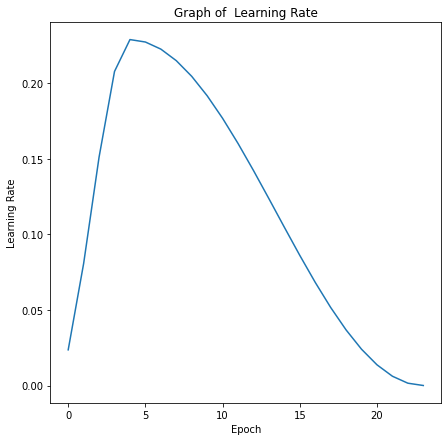

In [12]:
from graphplot import plot_misclassified_images, plot_graph, plot_acc_loss_graph
plot_graph(modeldata.learning_rate_history, "Learning Rate")

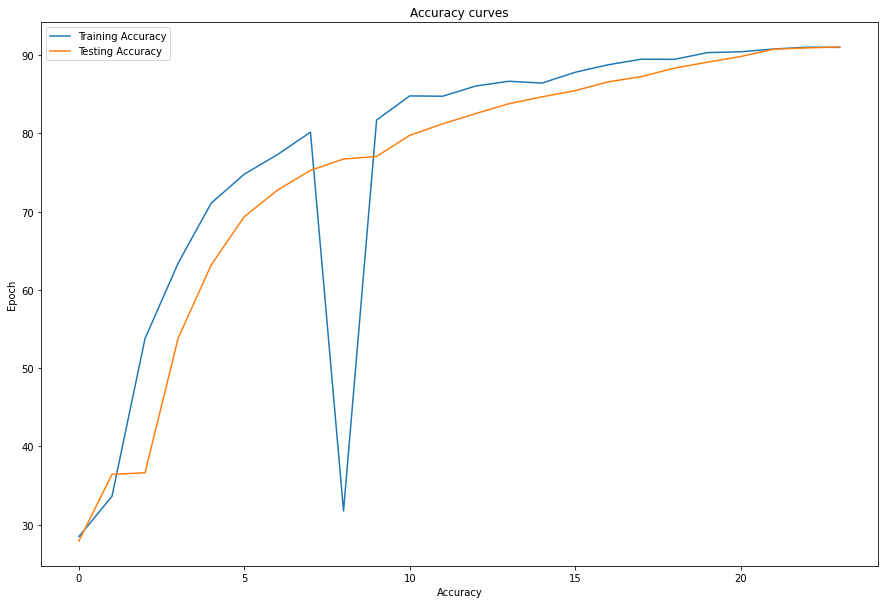

In [13]:
plot_acc_loss_graph(modeldata.test_accs,modeldata.train_acc )

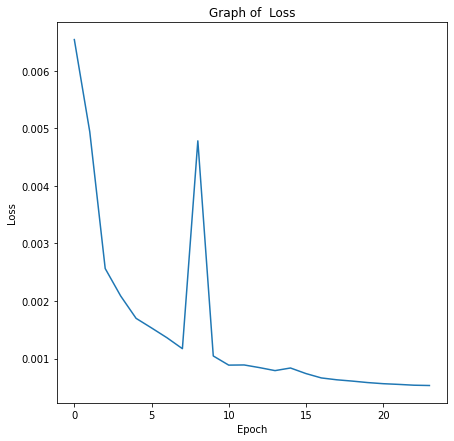

In [14]:
plot_graph(modeldata.test_losses, "Loss")